## Print training and evaluation stats given a log file

In [1]:
import json
import matplotlib.pyplot as plt

In [18]:
# Read log file
# Path to your log file
logfile = "/cluster/work/bewi/members/rquiles/experiments/test_3cell_lines/slurm.out"

# Storage
epochs = []
training_stats = {}
evaluation_stats = {}

# Read file line by line
with open(logfile, "r") as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        try:
            record = json.loads(line)
        except json.JSONDecodeError:
            continue  # skip malformed lines

        # If line has an epoch, collect stats
        if "epoch" in record:
            epochs.append(record["epoch"])

            # Training stats
            for k, v in record["training_stats"].items():
                training_stats.setdefault(k, []).append(v)

            # Evaluation stats
            for split, vals in record["evaluation_stats"].items():
                for i, v in enumerate(vals):
                    key = f"{split}_{i}"  # e.g. "train_0", "test_1"
                    evaluation_stats.setdefault(key, []).append(v)

# Adjust KL divergence for visualization
training_stats["KL Divergence Short"] = [training_stats["KL Divergence"][1]]
training_stats["KL Divergence Short"].extend(training_stats["KL Divergence"][1:])
print(training_stats["KL Divergence Short"])

# Rename evaluation variables
evaluation_stats["Mean (training)"] = evaluation_stats.pop("train_0")
evaluation_stats["Stddev (training)"] = evaluation_stats.pop("train_1")
evaluation_stats["Mean (test)"] = evaluation_stats.pop("test_0")
evaluation_stats["Stddev (test)"] = evaluation_stats.pop("test_1")

[2647.8884962061097, 2647.8884962061097, 4064.9375709257015, 4174.091514494973, 230249.67361238404, 271414.14211715263, 344914.89742351405, 656548.8029597867, 555188.2091508803, 2476091.41914951, 655933.2841561364, 771581.7401745068, 1065557.584512036, 871537.5778222891, 1698614.5899152306, 24603728.394130114, 3827410.576349209, 4251463.259841344, 4475644.9623514265]


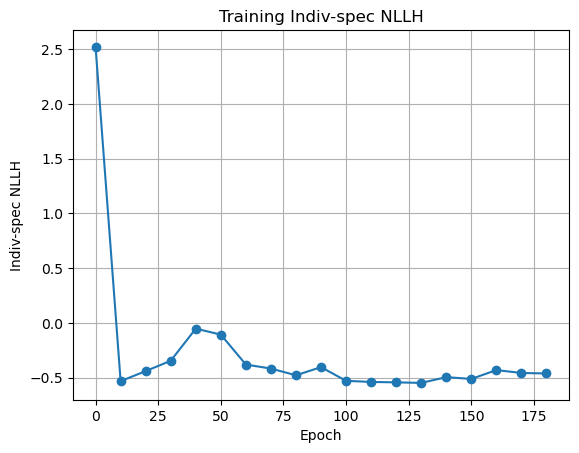

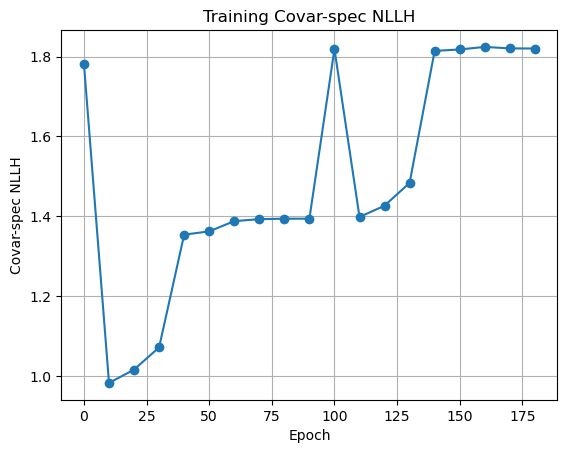

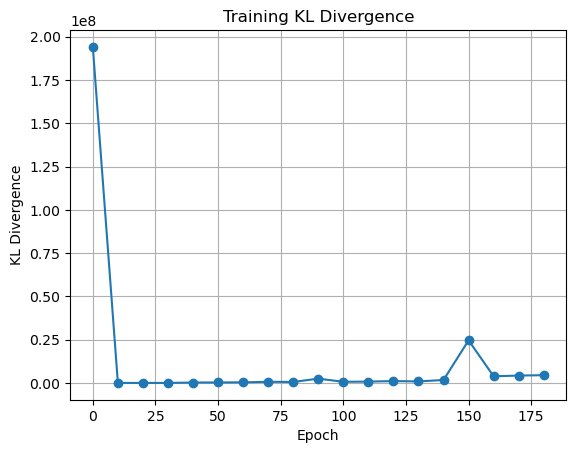

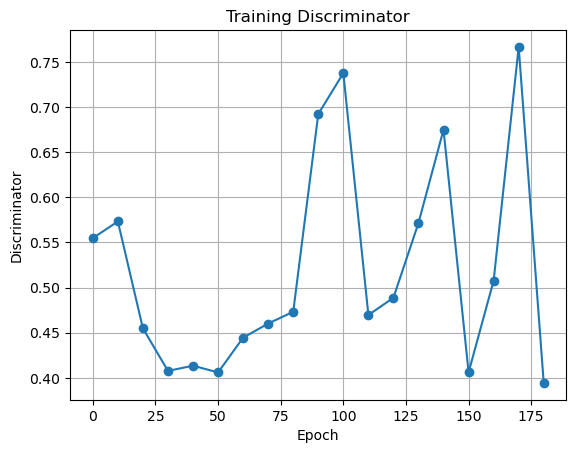

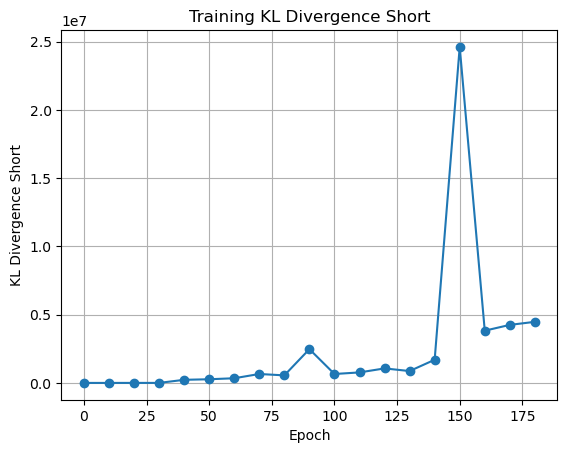

In [16]:
# Plot training stats
for k, vals in training_stats.items():
    plt.figure()
    plt.plot(epochs, vals, marker="o")
    plt.title(f"Training {k}")
    plt.xlabel("Epoch")
    plt.ylabel(k)
    plt.grid(True)
    plt.show()

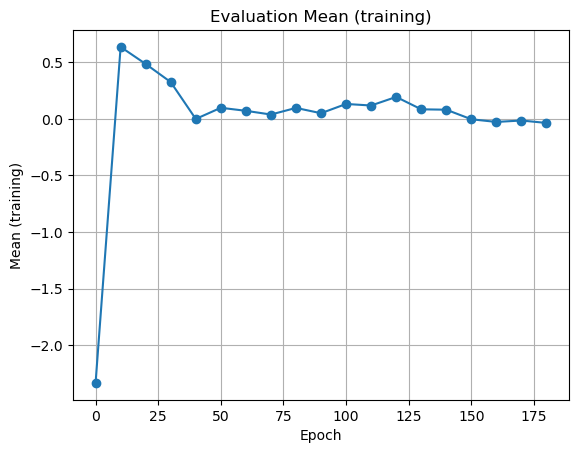

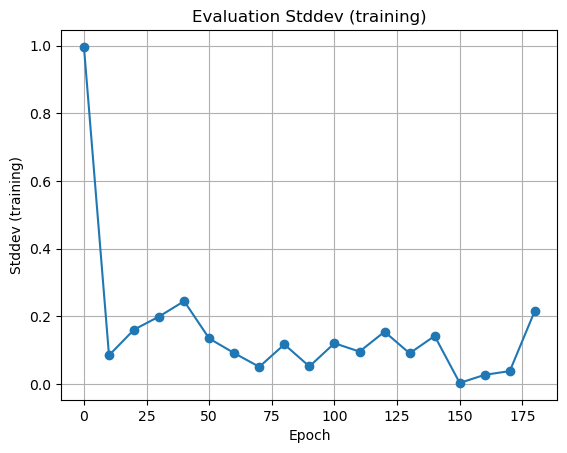

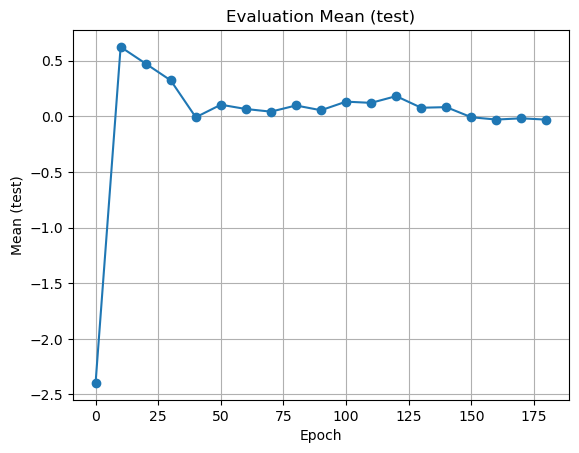

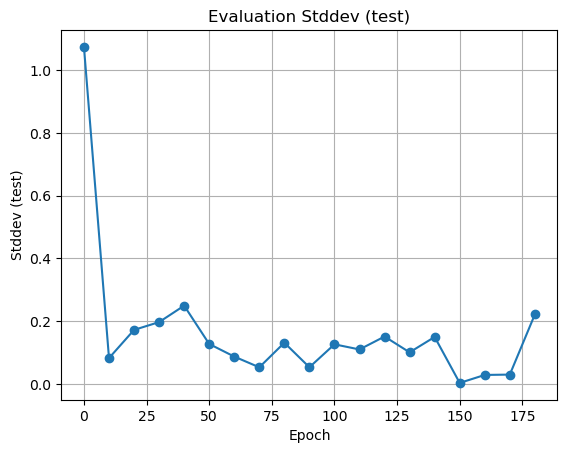

In [19]:
# Plot evaluation stats
for k, vals in evaluation_stats.items():
    plt.figure()
    plt.plot(epochs, vals, marker="o")
    plt.title(f"Evaluation {k}")
    plt.xlabel("Epoch")
    plt.ylabel(k)
    plt.grid(True)
    plt.show()